In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO
import cv2

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # You can also use 'yolov8s.pt' etc.

# Load image
image_path = "download.jpg"
img = cv2.imread(image_path)

# Run detection
results = model(img)

# Parse detections
people = []
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])
        if model.names[cls] == "person":
            people.append(box)

# Draw bounding boxes
for idx, box in enumerate(people, start=1):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"Person {idx}"
    cv2.putText(img, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Add total count text
cv2.putText(img, f"Total People: {len(people)}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Show result
#cv2.imshow("Detected People", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally save image
cv2.imwrite("output.jpg", img)



0: 448x640 10 persons, 132.7ms
Speed: 3.9ms preprocess, 132.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


True


0: 448x640 11 persons, 150.2ms
Speed: 4.5ms preprocess, 150.2ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


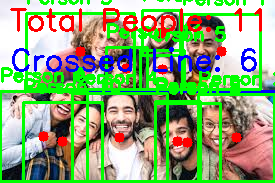

True

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load model
model = YOLO('yolov8n.pt')

# Load image
img_path = 'download.jpg'
image = cv2.imread(img_path)

# Define virtual line (horizontal, near middle)
line_y = image.shape[0] // 2
cv2.line(image, (0, line_y), (image.shape[1], line_y), (255, 0, 0), 2)

# Run YOLO
results = model(image)[0]

# Detect people
people = [box for box in results.boxes if int(box.cls[0]) == 0]

# Counter for people who cross the line
cross_count = 0

# Process each detection
for idx, box in enumerate(people, start=1):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2  # Center of the box

    # Draw box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"Person {idx}"
    cv2.putText(image, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Draw center point
    cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)

    # Check if center crossed the line
    if cy > line_y:
        cross_count += 1

# Draw total person count
cv2.putText(image, f"Total People: {len(people)}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Draw people crossing line count
cv2.putText(image, f"Crossed Line: {cross_count}", (10, 70),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show result
cv2_imshow(image)

# Optional: Save output
cv2.imwrite('output.jpg', image)


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import os

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt' for better accuracy

# Open uploaded video
cap = cv2.VideoCapture(0)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create video writer
output_path = 'output_with_boxes.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_num += 1
    results = model(frame)[0]

    # Filter detections for persons only
    people = [box for box in results.boxes if int(box.cls[0]) == 0]

    # Draw bounding boxes and labels
    for idx, box in enumerate(people, start=1):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"Person {idx}"
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Add total person count
    cv2.putText(frame, f"Total People: {len(people)}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Write frame to output video
    out.write(frame)

    # Show every 30th frame in Colab
    if frame_num % 30 == 0:
        print(f"Processed frame: {frame_num}")
        resized = cv2.resize(frame, (640, 360))
        cv2_imshow(resized)

# Clean up
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Done! Processed video saved as:", output_path)


✅ Done! Processed video saved as: output_with_boxes.mp4


In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np

# Load YOLO model
model = YOLO('yolov8n.pt')

# Load image
img_path = 'download.jpg'
image = cv2.imread(img_path)
clone = image.copy()

points = []

def click_event(event, x, y, flags, param):
    global points, image

    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        # Draw small circle for each point clicked
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        # If more than 1 point, draw line from last to current
        if len(points) > 1:
            cv2.line(image, points[-2], points[-1], (0, 255, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to confirm", image)

def point_in_polygon(point, polygon):
    # Use cv2.pointPolygonTest to check if point is inside polygon
    return cv2.pointPolygonTest(np.array(polygon, dtype=np.int32), point, False) >= 0

def main():
    global image, clone, points

    cv2.namedWindow("Draw Zone - Press 'c' to confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to confirm", click_event)

    print("Instructions:")
    print(" - Click points on the image to draw the polygonal zone.")
    print(" - Press 'c' when done to close polygon and run detection.")
    print(" - Press 'r' to reset points and redraw.")
    print(" - Press 'q' to quit.")

    while True:
        cv2.imshow("Draw Zone - Press 'c' to confirm", image)
        key = cv2.waitKey(1) & 0xFF

        if key == ord('c'):
            if len(points) >= 3:
                # Close polygon by drawing line from last to first point
                cv2.line(image, points[-1], points[0], (0, 255, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to confirm", image)
                break
            else:
                print("Need at least 3 points to form a polygon.")
        elif key == ord('r'):
            points = []
            image = clone.copy()
            cv2.imshow("Draw Zone - Press 'c' to confirm", image)
        elif key == ord('q'):
            print("Quitting without detection.")
            cv2.destroyAllWindows()
            return

    cv2.destroyAllWindows()

    # Run YOLO detection
    results = model(clone)[0]

    # Filter people detections (class 0)
    people = [box for box in results.boxes if int(box.cls[0]) == 0]

    inside_count = 0
    for idx, box in enumerate(people, start=1):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

        if point_in_polygon((cx, cy), points):
            inside_count += 1
            color = (0, 255, 0)  # green inside
        else:
            color = (0, 0, 255)  # red outside

        # Draw bounding box and center point
        cv2.rectangle(clone, (x1, y1), (x2, y2), color, 2)
        cv2.circle(clone, (cx, cy), 5, color, -1)
        label = f"Person {idx}"
        cv2.putText(clone, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Draw polygon zone on final image
    cv2.polylines(clone, [np.array(points)], isClosed=True, color=(255, 0, 0), thickness=2)

    # Display counts
    cv2.putText(clone, f"Total People: {len(people)}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    cv2.putText(clone, f"Inside Zone: {inside_count}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Show final result
    cv2.imshow("Detection Result", clone)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Optionally save result
    cv2.imwrite('output_manual_zone.jpg', clone)

if __name__ == "__main__":
    main()



0: 448x640 10 persons, 175.8ms
Speed: 6.5ms preprocess, 175.8ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


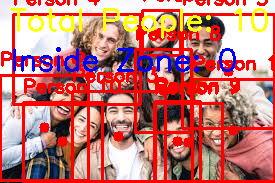

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
from google.colab.patches import cv2_imshow

# Load model
model = YOLO('yolov8n.pt')

# Load image
img_path = 'download.jpg'
image = cv2.imread(img_path)

# Define polygon points manually (edit this list as needed)
polygon_points = [(100, 300), (500, 300), (550, 500), (50, 500)]

# Draw polygon
cv2.polylines(image, [np.array(polygon_points)], isClosed=True, color=(255, 0, 0), thickness=2)

# Run YOLO detection
results = model(image)[0]

people = [box for box in results.boxes if int(box.cls[0]) == 0]

inside_count = 0

for idx, box in enumerate(people, start=1):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

    # Check if inside polygon
    inside = cv2.pointPolygonTest(np.array(polygon_points, dtype=np.int32), (cx, cy), False) >= 0

    color = (0, 255, 0) if inside else (0, 0, 255)
    if inside:
        inside_count += 1

    # Draw boxes and centers
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.circle(image, (cx, cy), 5, color, -1)
    label = f"Person {idx}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Show counts on image
cv2.putText(image, f"Total People: {len(people)}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
cv2.putText(image, f"Inside Zone: {inside_count}", (10, 70),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Show image in Colab
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
